Epoch 1/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 2/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 3/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 4/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 5/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 6/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 7/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 8/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 9/100
17/17 [==============================] - 0s - loss: 10.4294        
Epoch 10/100
17/17 [==============================] - 0s - loss: 10.4294        
Epoch 11/100
17/17 [==============================] - 0s - loss: 10.4294        
Epoch 12/100
17/17 [==============================] - 0s - loss: 10.4294     
Epoch 13/100
17/17 [==============================] - 0s - loss:

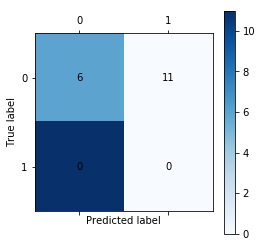

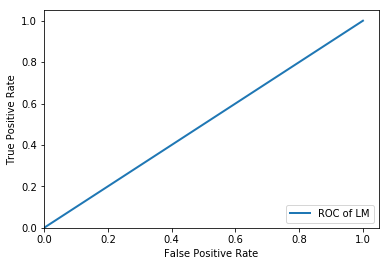

In [9]:
import pandas as pd
from random import shuffle
datafile='F:/P-file/test.xls'
data=pd.read_excel(datafile)
data=data.as_matrix()
shuffle(data)#随机打乱数据
p=0.8
train=data[:int(len(data)*p),:]#  训练集
test=data[int(len(data)*p):,:] #测试集
from keras.models import Sequential#序贯模型
from keras.layers.core import Dense,Activation
netfile='F:/P-file/net.model'
net=Sequential()#序贯模型
net.add(Dense(input_dim=3,units=10))#添加输入层（3节点）到隐藏层（10节点）的连接
net.add(Activation('relu'))#隐藏层使用relu激活函数
net.add(Dense(input_dim=10,units=1))#添加隐藏层（10节点）到输出层（1节点）的连接
net.add(Activation('sigmoid'))#输出层使用relu激活函数
net.compile(loss='binary_crossentropy',optimizer='adam')#损失函数和优化器
net.fit(train[:,:3],train[:,3],epochs=100,batch_size=1)#batch_size指的是小批量梯度下降法
net.save_weights(netfile)
predict_result=net.predict_classes(train[:,:3]).reshape(len(train))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot_matplotlib(y_truth, y_predict, cmap=plt.cm.Blues):#自定义混淆矩阵
    cm = confusion_matrix(y_truth, y_predict)
    plt.matshow(cm, cmap=cmap)  # 混淆矩阵图
    plt.colorbar()  # 颜色标签
    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    plt.show()  # 显示作图结果
confusion_matrix_plot_matplotlib(train[:,3],predict_result)
from sklearn.metrics import roc_curve
predict_result=net.predict(test[:,:3]).reshape(len(test))
fpr,tpr,thresholds=roc_curve(test[:,3],predict_result,pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC of LM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()